In [45]:
# Importacion de las librerias que se usaran.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

# Modulo 1. Cargar los datos

In [46]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url, header= None)

In [47]:
# Visualizacion de las 5 primeras filas del df.
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [48]:
df.dtypes

0     float64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
dtype: object

In [49]:
# Funcion para describir en esencia lo analitico de los datos.
df.describe

<bound method NDFrame.describe of             0           1                2         3         4          5   \
0          NaN          id             date     price  bedrooms  bathrooms   
1          0.0  7129300520  20141013T000000  221900.0       3.0        1.0   
2          1.0  6414100192  20141209T000000  538000.0       3.0       2.25   
3          2.0  5631500400  20150225T000000  180000.0       2.0        1.0   
4          3.0  2487200875  20141209T000000  604000.0       4.0        3.0   
...        ...         ...              ...       ...       ...        ...   
21609  21608.0   263000018  20140521T000000  360000.0       3.0        2.5   
21610  21609.0  6600060120  20150223T000000  400000.0       4.0        2.5   
21611  21610.0  1523300141  20140623T000000  402101.0       2.0       0.75   
21612  21611.0   291310100  20150116T000000  400000.0       3.0        2.5   
21613  21612.0  1523300157  20141015T000000  325000.0       2.0       0.75   

                6         7  

# Modulo 2. Preparacion de datos

In [50]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [51]:
df.describe

<bound method NDFrame.describe of                     2         3         4          5            6         7   \
0                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot   
1      20141013T000000  221900.0       3.0        1.0         1180      5650   
2      20141209T000000  538000.0       3.0       2.25         2570      7242   
3      20150225T000000  180000.0       2.0        1.0          770     10000   
4      20141209T000000  604000.0       4.0        3.0         1960      5000   
...                ...       ...       ...        ...          ...       ...   
21609  20140521T000000  360000.0       3.0        2.5         1530      1131   
21610  20150223T000000  400000.0       4.0        2.5         2310      5813   
21611  20140623T000000  402101.0       2.0       0.75         1020      1350   
21612  20150116T000000  400000.0       3.0        2.5         1600      2388   
21613  20141015T000000  325000.0       2.0       0.75         1020      1076   

     

In [52]:
headers = ["date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]
df.columns = headers

In [53]:
df.drop(index=0, inplace=True)

In [54]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
5,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,20140521T000000,360000.0,3.0,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,20150223T000000,400000.0,4.0,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.36200000000001,1830,7200
21611,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.29899999999999,1020,2007
21612,20150116T000000,400000.0,3.0,2.5,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [55]:
# Valores faltantes para dormitorios y baños
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [56]:
# reemplazando los valores faltantes de la columna bedrooms por la media.
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

C:\Users\Germa\AppData\Local\Temp\ipykernel_15572\25038474.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [57]:
# Lo mismo que la anterior linea pero para bathrooms
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

C:\Users\Germa\AppData\Local\Temp\ipykernel_15572\1198038852.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [58]:
# Ya no tenemos valores nulos en estas casillas.
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# MODULO 3. Analisis exploratorio de datos

In [59]:
# Cantidad de casas con valor de piso unico
floor_counts = df['floors'].value_counts()
floor_counts = floor_counts.to_frame(name='count')
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

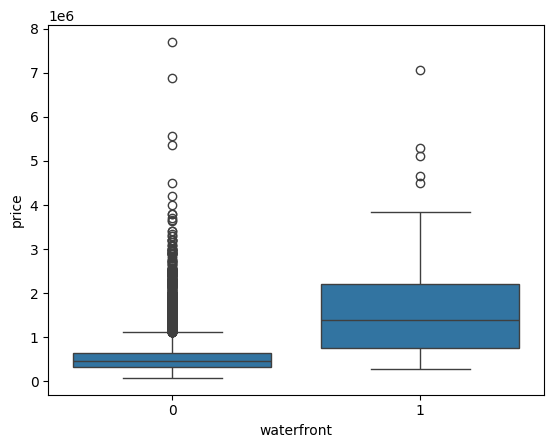

In [60]:
# Grafico de caja entre vista al mar y el precio
df['price'] = pd.to_numeric(df['price'], errors='coerce')
houses_with_waterfront = df[df['waterfront'] == 1]
houses_without_waterfront = df[df['waterfront'] == 0]
sns.boxplot(x='waterfront', y='price', data=df) 

<Axes: xlabel='sqft_above', ylabel='price'>

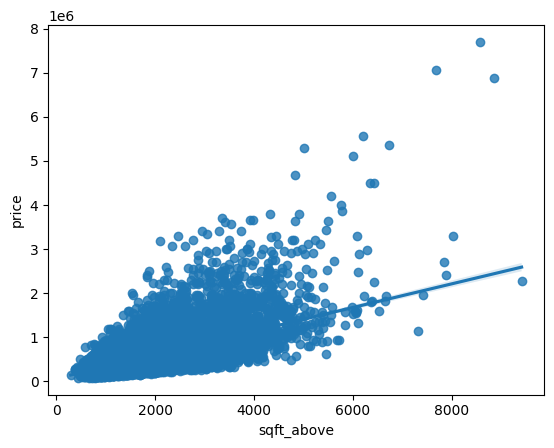

In [61]:
# Grafico para determinar la correlacion entre las dos variables.
df['sqft_above'] = pd.to_numeric(df['sqft_above'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
sns.regplot(x='sqft_above', y='price', data=df)

# Modulo 4. Desarrollo del modelo

In [62]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [63]:
# Modelo de regrecion lineal con sqft_living y price
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [64]:
# Modelo de regrecion utilizando varias caracteristicas.
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm.fit(Z,Y)
lm.score(Z, Y)

0.65769516660375

In [65]:
# Objeto de tipo Pipeline con las caracteristicas y variables conocidas.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
r2_score(Y,ypipe)

0.7513408515988734

# Modulo 5. Refinamiento del modelo

In [68]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [69]:
#  Modelo de regrecion Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
r2_score(y_test,yhat)

0.6478759163939114

In [71]:
# Transformacion polinomica para los datos.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
r2_score(y_test,y_hat)

0.7002744278414128